General Information

Download Libraries and Data

In [603]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [604]:
import category_encoders as ce

In [605]:
df = pd.read_excel('FAFO Religious Info.xlsx', sheet_name = 'Religious Data')

In [606]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['housheold_id', 'department', 'roster_id_of_rsi_responsent',
       'parents_in_household',
       'go_to_church_together_with_other_household_members',
       'clothes_for_church',
       'agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'',
       'gender', 'age', 'religion',
       'victim_of_physical_or_sexual_violence_past_12_months_among_children_aged_5-17',
       'wealth_quintiles', 'child_domestic_status',
       'current_school_attendance', 'relocated_child',
       'quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23',
       'roster_id'],
      dtype='object')

Data Overview

In [607]:
df.head()

,housheold_id,department,roster_id_of_rsi_responsent,parents_in_household,go_to_church_together_with_other_household_members,clothes_for_church,agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy',gender,age,religion,victim_of_physical_or_sexual_violence_past_12_months_among_children_aged_5-17,wealth_quintiles,child_domestic_status,current_school_attendance,relocated_child,"quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23",roster_id
0,HH_key,DepartementCode,AS11,MI05,HT33,HT34,HT38,HR04,HR05,HR06,HH12,wealthidx5,CDS,CSA,relochd,QuinWorkLoad,HR01
1,1001_1309,Northeast,3,None,Never,NaN,True,Female,28,Catholic,NaN,High wealth,NaN,NaN,NaN,NaN,1
2,1001_1309,Northeast,3,None,Never,NaN,True,Male,30,Catholic,NaN,High wealth,NaN,NaN,NaN,NaN,2
3,1001_1309,Northeast,3,None,Never,NaN,True,Female,17,Catholic,Physical violence,High wealth,Non-servant child,Not attending school,Yes,Upper 5,3
4,1002_1374,Northeast,3,None,Sometimes,Special clothes,Sometimes true,Female,46,Other Christian,NaN,Medium wealth,NaN,NaN,NaN,NaN,1


In [608]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10877 entries, 0 to 10876
Data columns (total 17 columns):
housheold_id                                                                             10877 non-null object
department                                                                               10877 non-null object
roster_id_of_rsi_responsent                                                              9502 non-null object
parents_in_household                                                                     9366 non-null object
go_to_church_together_with_other_household_members                                       9349 non-null object
clothes_for_church                                                                       7172 non-null object
agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'    7610 non-null object
gender                                                                                   10877 non-null object
age     

Data Cleaning

In [609]:
df = df[df['roster_id_of_rsi_responsent'] == df['roster_id']]

In [610]:
pd.crosstab(df['roster_id_of_rsi_responsent'], [df['roster_id']], dropna=False)

roster_id,1,2,3,4,5,6,7,8,9,10,11,13,14,17
roster_id_of_rsi_responsent,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,137,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,417,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,372,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,295,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,184,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,116,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,57,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,36,0,0,0,0,0


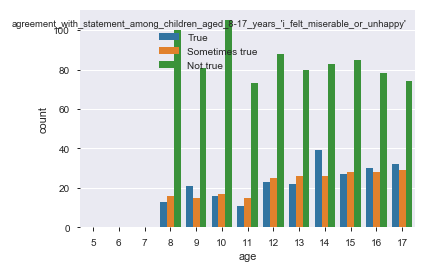

In [611]:
sns.countplot(data = df, x = "age" ,hue = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'")

In [612]:
df = df[df['age']>=8]

In [613]:
pp.ProfileReport(df)

Number of variables,18
Number of observations,1327
Total Missing (%),1.9%
Total size in memory,186.7 KiB
Average record size in memory,144.1 B
Numeric,4
Categorical,12
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [614]:
pd.crosstab(df['clothes_for_church'], [df['go_to_church_together_with_other_household_members']], dropna=False)

go_to_church_together_with_other_household_members,Always,Family does not go to church,Never,On special occasions,Sometimes
clothes_for_church,,,,,
Normal clothes,122,0,0,23,144
Special clothes,394,0,0,45,265


In [615]:
df1 = df[['clothes_for_church']]

In [616]:
for x in df1.columns:
    y = 'No Attendance'
    df[x] = df[x].fillna(y)

In [617]:
pd.crosstab(df['clothes_for_church'], [df['go_to_church_together_with_other_household_members']], dropna=False)

go_to_church_together_with_other_household_members,Always,Family does not go to church,Never,On special occasions,Sometimes
clothes_for_church,,,,,
No Attendance,0,49,265,0,0
Normal clothes,122,0,0,23,144
Special clothes,394,0,0,45,265


In [618]:
for x in df.columns:
    if x == 'housheold_id':
        pass
    else:
        y = df[x].mode().iloc[0]
        df[x] = df[x].fillna(y)

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 3 to 10850
Data columns (total 17 columns):
housheold_id                                                                             1327 non-null object
department                                                                               1327 non-null object
roster_id_of_rsi_responsent                                                              1327 non-null int64
parents_in_household                                                                     1327 non-null object
go_to_church_together_with_other_household_members                                       1327 non-null object
clothes_for_church                                                                       1327 non-null object
agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'    1327 non-null object
gender                                                                                   1327 non-null object
age          

In [620]:
df = df.drop(['roster_id_of_rsi_responsent', 'roster_id'], axis=1)

Encoding

In [621]:
df2 = df.iloc[:,1:]

In [622]:
df2['go_to_church_together_with_other_household_members'].value_counts()

Always                          536
Sometimes                       409
Never                           265
On special occasions             68
Family does not go to church     49
Name: go_to_church_together_with_other_household_members, dtype: int64

In [623]:
df2['clothes_for_church'].value_counts()

Special clothes    704
No Attendance      334
Normal clothes     289
Name: clothes_for_church, dtype: int64

In [624]:
def church_attendance(x):
    if x == 'Always':
        return 1
    elif x == 'Sometimes':
        return 2
    elif x == 'On special occasions':
        return 3
    elif x == 'Family does not go to church':
        return 4
    elif x == 'Never':
        return 5

In [625]:
def church_clothes(x):
    if x == 'Special clothes':
        return 1
    elif x == 'Normal clothes':
        return 2
    elif x == 'No Attendance':
        return 3

In [626]:
df2['go_to_church_together_with_other_household_members'] = df2['go_to_church_together_with_other_household_members'].apply(lambda x: church_attendance(x)) 
df2['clothes_for_church'] = df2['clothes_for_church'].apply(lambda x: church_clothes(x))

In [627]:
df2['clothes_for_church'].value_counts()

1    704
3    334
2    289
Name: clothes_for_church, dtype: int64

In [628]:
df2['go_to_church_together_with_other_household_members'].value_counts()

1    536
2    409
5    265
3     68
4     49
Name: go_to_church_together_with_other_household_members, dtype: int64

In [629]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
df_encode = ohe.fit_transform(df2)
df_encode.head()

,department_Northeast,department_North,department_Nippes,department_South,department_Grand Anse,department_Artibonite,department_Centre,department_Northwest,department_West,department_Southeast,...,relocated_child_Yes,relocated_child_No,"quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23_Upper 5","quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23_Lower 2","quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23_Lower 1","quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23_Upper 4","quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23_Upper 3",go_to_church_together_with_other_household_members,clothes_for_church,age
3,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,5,3,17
6,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,2,1,15
10,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,17
17,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,14
24,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,8


In [630]:
df_encode.columns

Index(['department_Northeast', 'department_North', 'department_Nippes',
       'department_South', 'department_Grand Anse', 'department_Artibonite',
       'department_Centre', 'department_Northwest', 'department_West',
       'department_Southeast', 'department_Metropolitan',
       'parents_in_household_None', 'parents_in_household_Both parents',
       'parents_in_household_Only mother', 'parents_in_household_Only father',
       'agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_True',
       'agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_Sometimes true',
       'agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_Not true',
       'gender_Female', 'gender_Male', 'religion_Catholic',
       'religion_Other Christian', 'religion_Protestant', 'religion_Baptist',
       'religion_No religion', 'religion_Voodooist',
       'religion_Jehovah's witness',
       'victim_of_physica

In [631]:
cols = list(df_encode)
# move the column to head of list using index, pop and insert
cols.insert(13, cols.pop(cols.index('age')))
df_encode = df_encode.ix[:, cols]

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


Analysis

In [632]:
focus_col = ['go_to_church_together_with_other_household_members']
corr_church = df_encode.corr().filter(focus_col).drop(focus_col)
corr_church['go_to_church_together_with_other_household_members'] = corr_church['go_to_church_together_with_other_household_members'].apply(lambda x: abs(x))
corr_church = corr_church.sort_values(by=['go_to_church_together_with_other_household_members'],ascending=False)
corr_church

,go_to_church_together_with_other_household_members
clothes_for_church,0.794015
current_school_attendance_Attending school,0.185933
current_school_attendance_Not attending school,0.185933
religion_No religion,0.171389
religion_Protestant,0.159504
religion_Catholic,0.157358
agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_True,0.146179
agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_Not true,0.130645
age,0.104788
parents_in_household_Both parents,0.102324


In [633]:
focus_col = ['clothes_for_church']
corr_church = df_encode.corr().filter(focus_col).drop(focus_col)
corr_church['clothes_for_church'] = corr_church['clothes_for_church'].apply(lambda x: abs(x))
corr_church = corr_church.sort_values(by=['clothes_for_church'],ascending=False)
corr_church

,clothes_for_church
go_to_church_together_with_other_household_members,0.794015
current_school_attendance_Attending school,0.210697
current_school_attendance_Not attending school,0.210697
religion_No religion,0.152427
agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_True,0.132505
wealth_quintiles_Lowest wealth,0.125082
religion_Catholic,0.121982
"quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23_Upper 5",0.114301
religion_Protestant,0.109694
religion_Other Christian,0.106069


Visualization

In [634]:
df['child_domestic_status'].value_counts()

Non-servant child         862
Child domestic servant    465
Name: child_domestic_status, dtype: int64

In [635]:
df_CDW = df[df['child_domestic_status']=='Child domestic servant']
df_Non = df[df['child_domestic_status']=='Non-servant child']

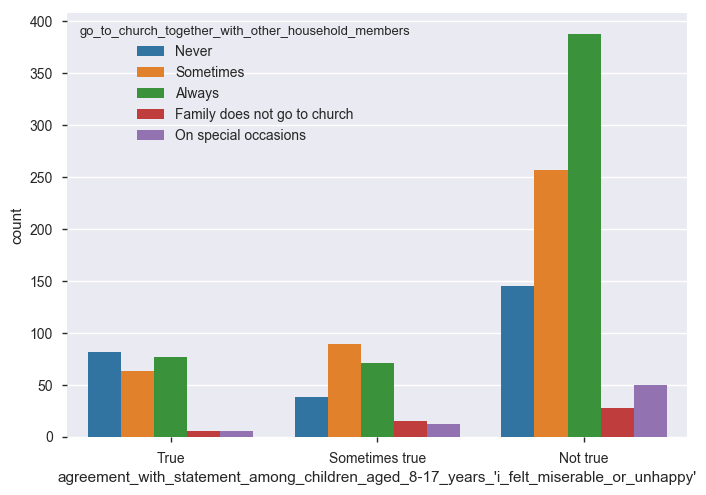

In [636]:
sns.countplot(data = df, x = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'"
              ,hue = 'go_to_church_together_with_other_household_members')

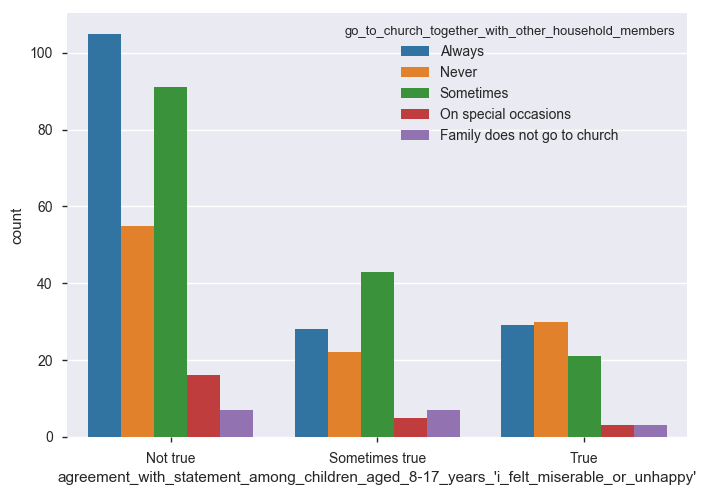

In [637]:
sns.countplot(data = df_CDW, x = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'"
              ,hue = 'go_to_church_together_with_other_household_members')

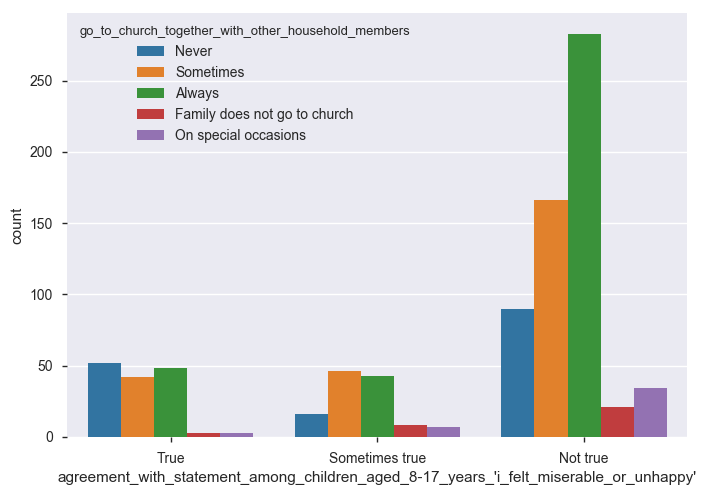

In [638]:
sns.countplot(data = df_Non, x = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'"
              ,hue = 'go_to_church_together_with_other_household_members')

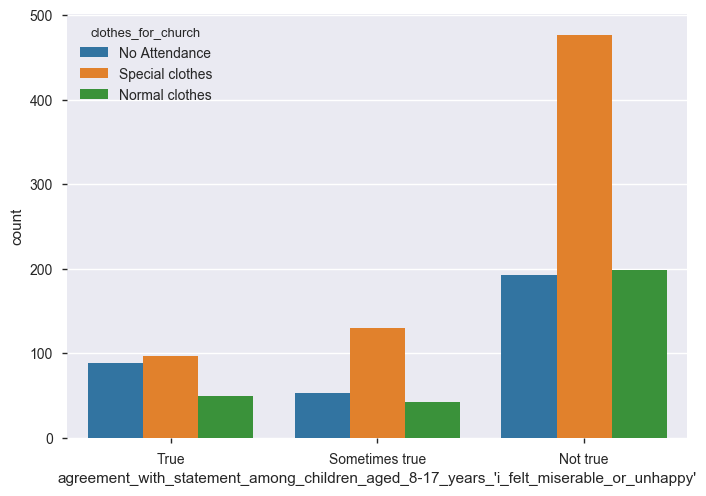

In [639]:
sns.countplot(data = df, x = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'"
              ,hue = 'clothes_for_church')

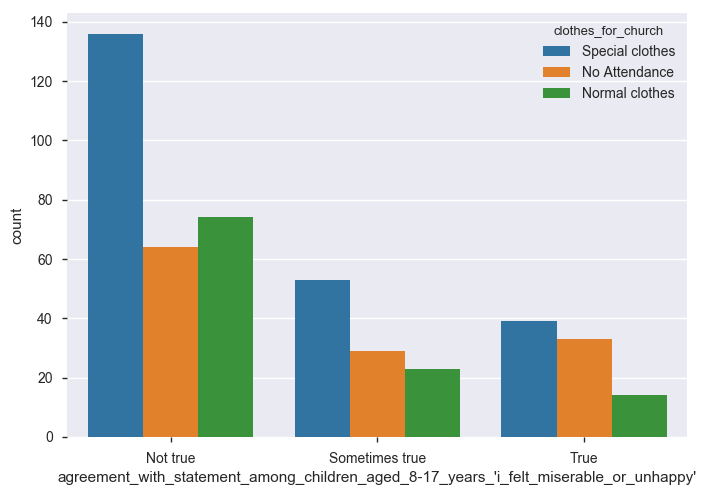

In [640]:
sns.countplot(data = df_CDW, x = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'"
              ,hue = 'clothes_for_church')

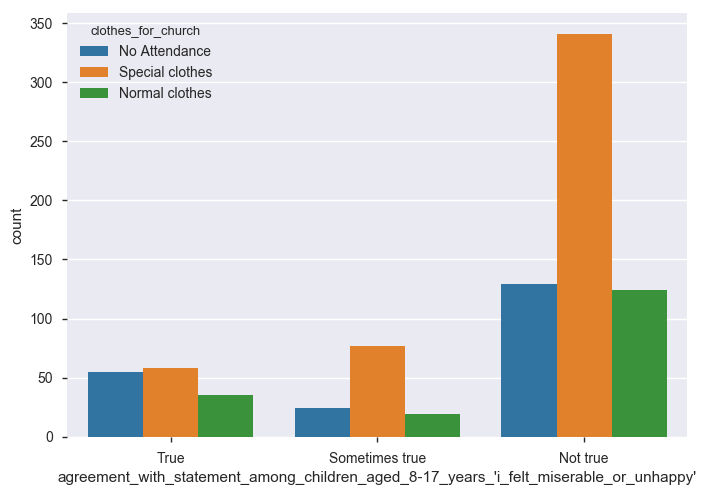

In [641]:
sns.countplot(data = df_Non, x = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'"
              ,hue = 'clothes_for_church')

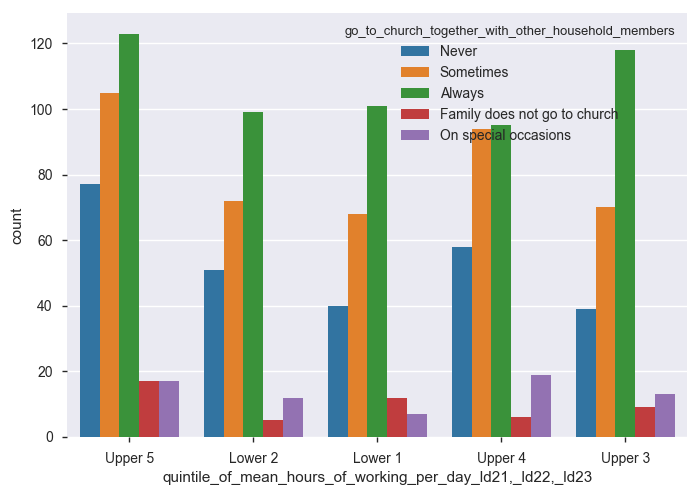

In [642]:
sns.countplot(data = df, x = "quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23"
              ,hue = 'go_to_church_together_with_other_household_members')

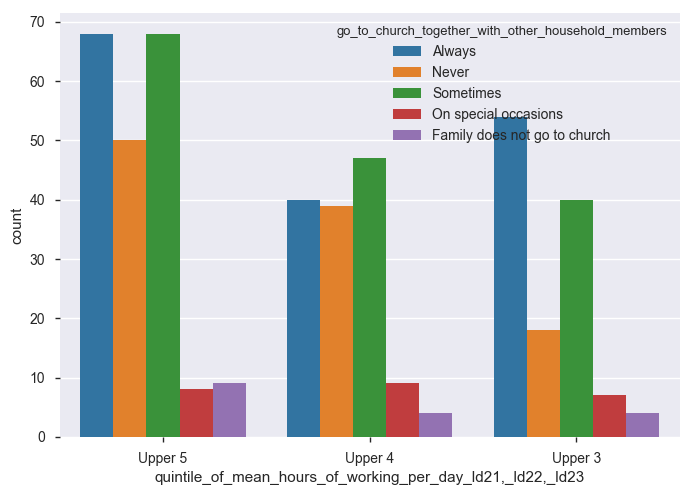

In [643]:
sns.countplot(data = df_CDW, x = "quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23"
              ,hue = 'go_to_church_together_with_other_household_members')

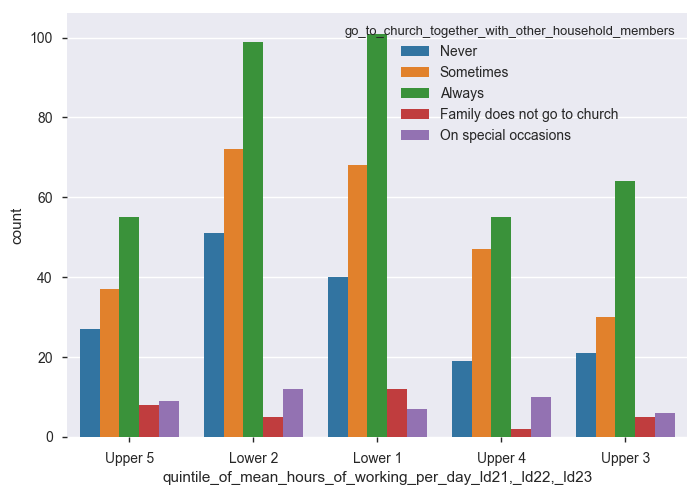

In [644]:
sns.countplot(data = df_Non, x = "quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23"
              ,hue = 'go_to_church_together_with_other_household_members')

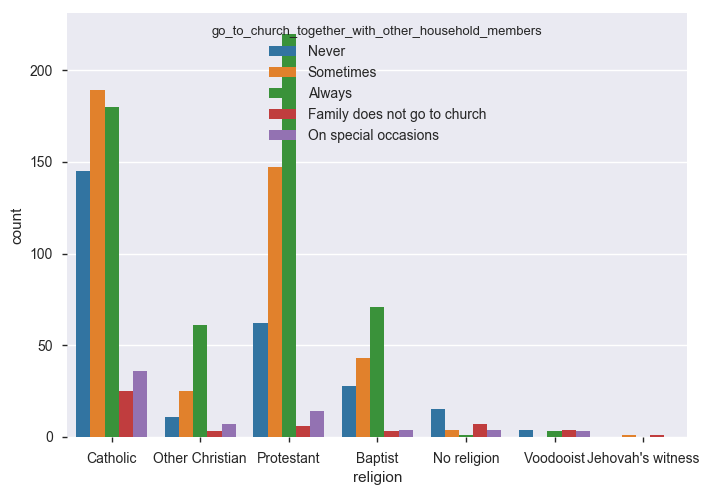

In [645]:
sns.countplot(data = df, x = "religion"
              ,hue = 'go_to_church_together_with_other_household_members')

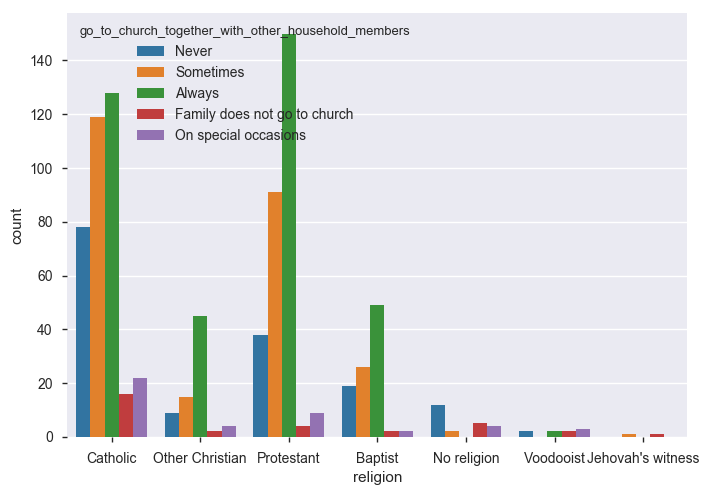

In [646]:
sns.countplot(data = df_Non, x = "religion"
              ,hue = 'go_to_church_together_with_other_household_members')

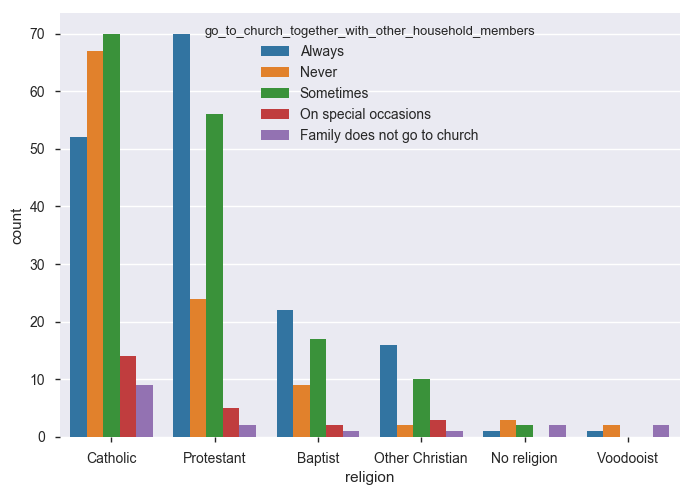

In [647]:
sns.countplot(data = df_CDW, x = "religion"
              ,hue = 'go_to_church_together_with_other_household_members')

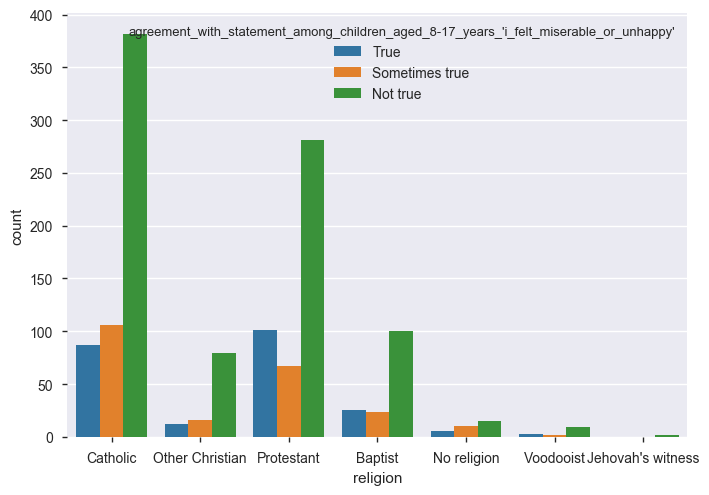

In [648]:
sns.countplot(data = df, x = "religion"
              ,hue = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'")

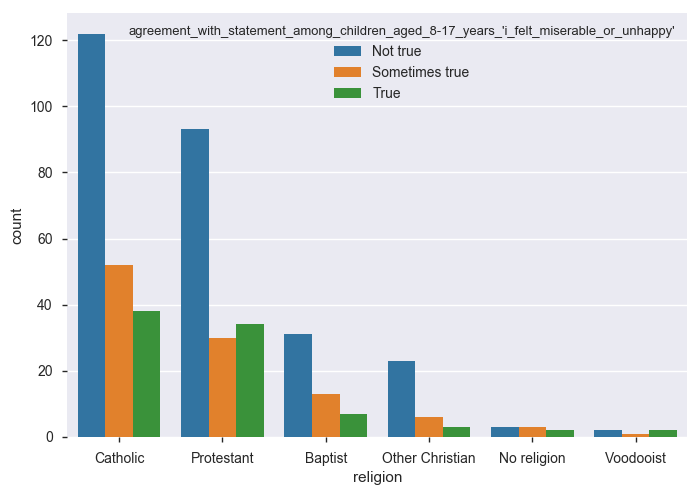

In [649]:
sns.countplot(data = df_CDW, x = "religion"
              ,hue = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'")

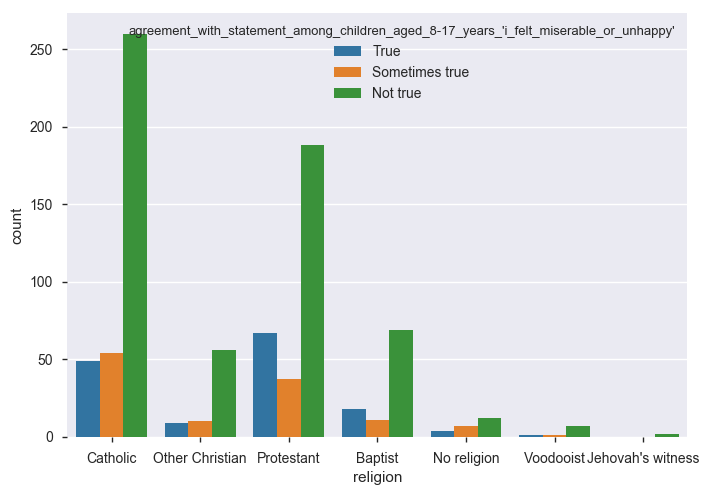

In [650]:
sns.countplot(data = df_Non, x = "religion"
              ,hue = "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'")

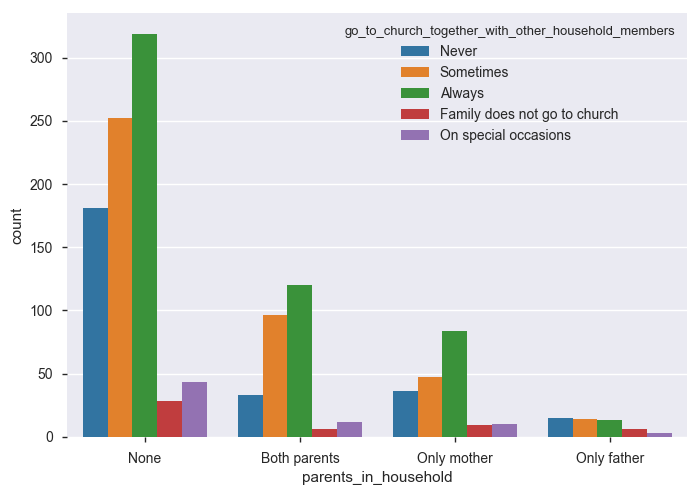

In [651]:
sns.countplot(data = df, x = "parents_in_household"
              ,hue = 'go_to_church_together_with_other_household_members')

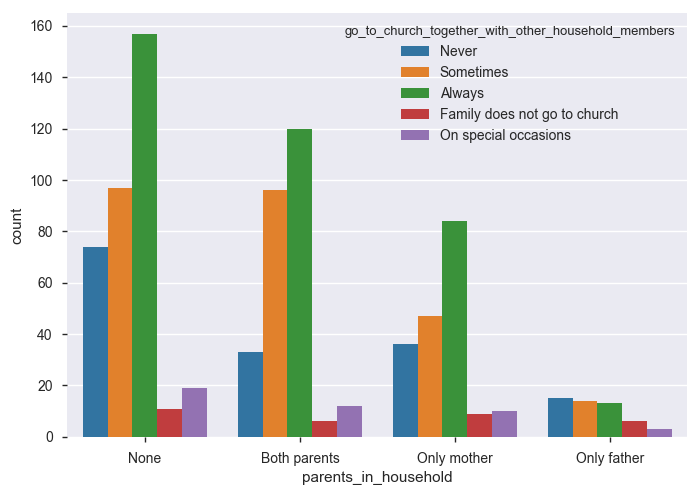

In [652]:
sns.countplot(data = df_Non, x = "parents_in_household"
              ,hue = 'go_to_church_together_with_other_household_members')

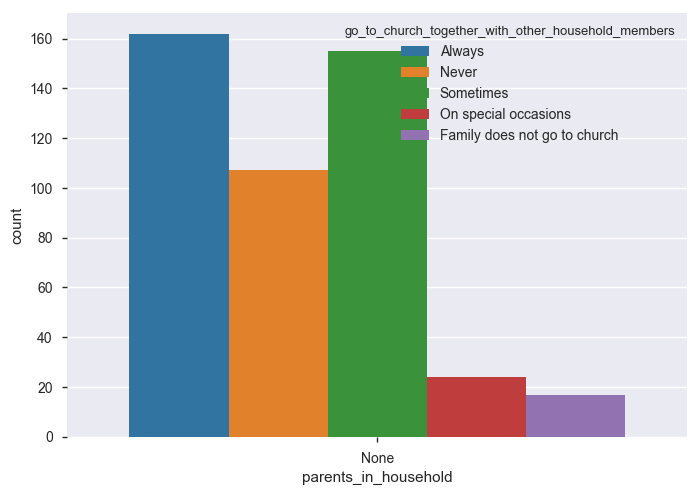

In [653]:
sns.countplot(data = df_CDW, x = "parents_in_household"
              ,hue = 'go_to_church_together_with_other_household_members')

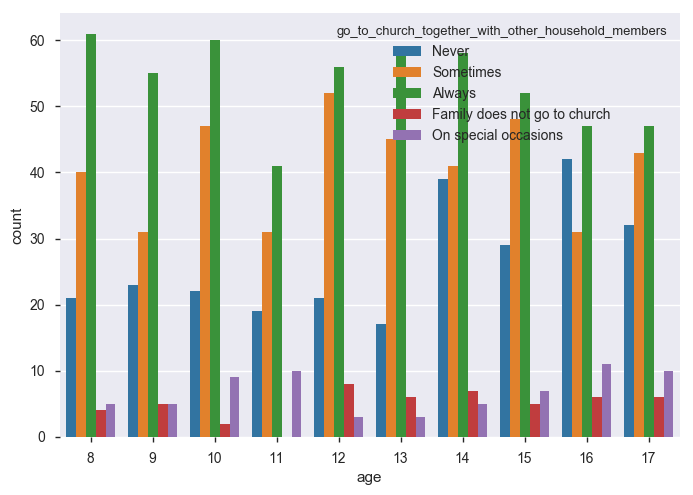

In [654]:
sns.countplot(data = df, x = "age"
              ,hue = 'go_to_church_together_with_other_household_members')

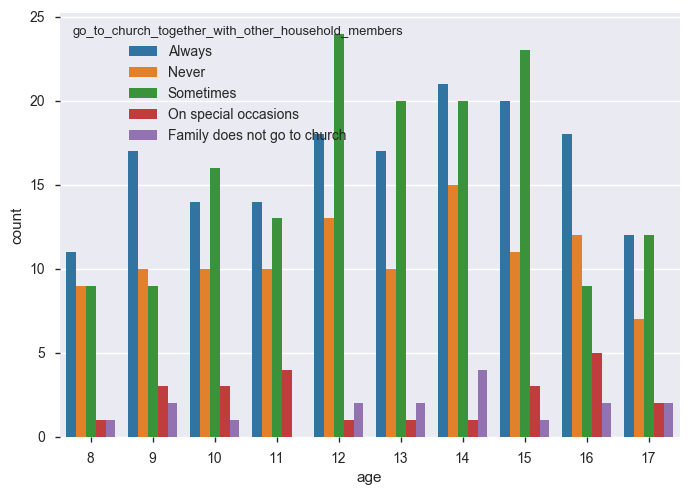

In [655]:
sns.countplot(data = df_CDW, x = "age"
              ,hue = 'go_to_church_together_with_other_household_members')

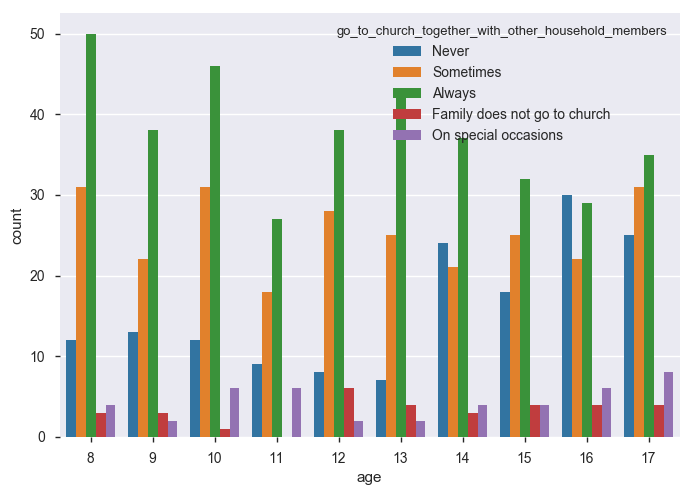

In [656]:
sns.countplot(data = df_Non, x = "age"
              ,hue = 'go_to_church_together_with_other_household_members')

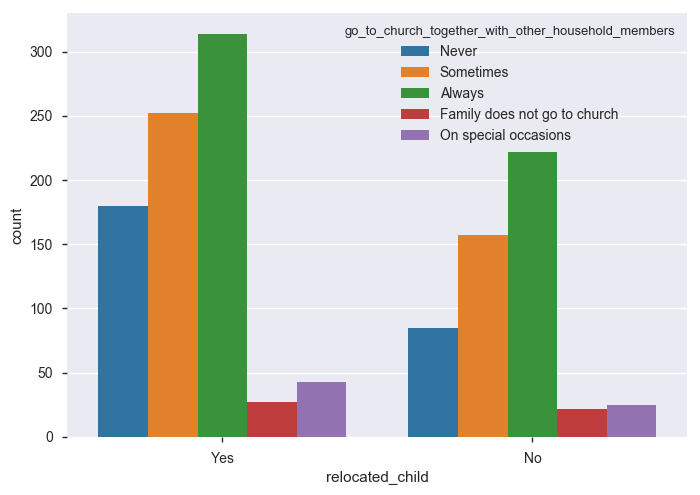

In [657]:
sns.countplot(data = df, x = "relocated_child"
              ,hue = 'go_to_church_together_with_other_household_members')

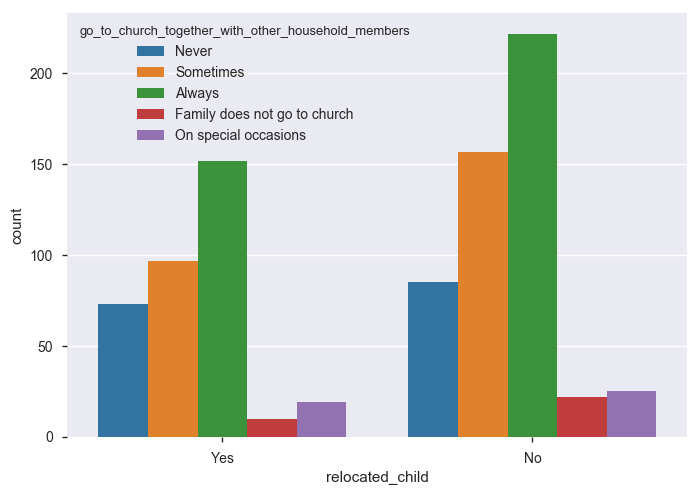

In [658]:
sns.countplot(data = df_Non, x = "relocated_child"
              ,hue = 'go_to_church_together_with_other_household_members')

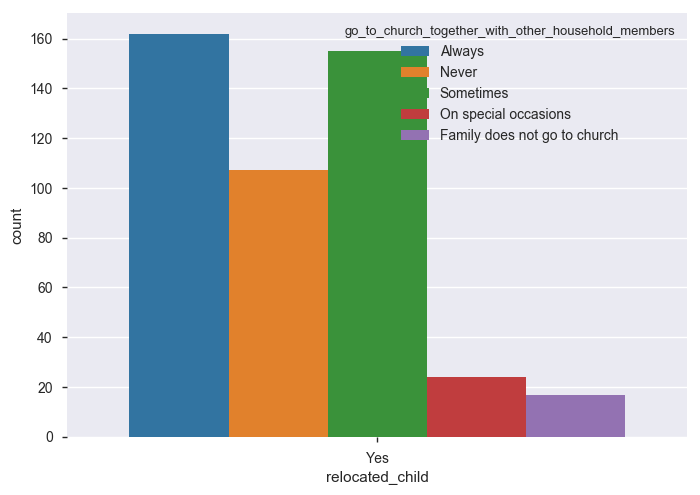

In [659]:
sns.countplot(data = df_CDW, x = "relocated_child"
              ,hue = 'go_to_church_together_with_other_household_members')

Modeling

In [660]:
df["child_domestic_status"].value_counts()

Non-servant child         862
Child domestic servant    465
Name: child_domestic_status, dtype: int64

In [661]:
df2 = df.iloc[:,1:]

In [662]:
df2.head()

,department,parents_in_household,go_to_church_together_with_other_household_members,clothes_for_church,agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy',gender,age,religion,victim_of_physical_or_sexual_violence_past_12_months_among_children_aged_5-17,wealth_quintiles,child_domestic_status,current_school_attendance,relocated_child,"quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23"
3,Northeast,None,Never,No Attendance,True,Female,17,Catholic,Physical violence,High wealth,Non-servant child,Not attending school,Yes,Upper 5
6,Northeast,None,Sometimes,Special clothes,Sometimes true,Male,15,Other Christian,None,Medium wealth,Non-servant child,Attending school,Yes,Lower 2
10,Northeast,None,Always,Special clothes,Not true,Male,17,Catholic,None,Highest wealth,Non-servant child,Attending school,Yes,Lower 1
17,Northeast,None,Always,Special clothes,Not true,Male,14,Catholic,Physical violence,Highest wealth,Child domestic servant,Attending school,Yes,Upper 5
24,Northeast,None,Always,Special clothes,Sometimes true,Female,8,Protestant,None,Highest wealth,Non-servant child,Attending school,Yes,Lower 2


In [663]:
df2 = df2.drop(['relocated_child', 'quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23',
               'parents_in_household'], axis = 1)

In [664]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
df2_model = ohe.fit_transform(df2)
df2_model.head()

,department_Northeast,department_North,department_Nippes,department_South,department_Grand Anse,department_Artibonite,department_Centre,department_Northwest,department_West,department_Southeast,...,wealth_quintiles_High wealth,wealth_quintiles_Medium wealth,wealth_quintiles_Highest wealth,wealth_quintiles_Low wealth,wealth_quintiles_Lowest wealth,child_domestic_status_Non-servant child,child_domestic_status_Child domestic servant,current_school_attendance_Not attending school,current_school_attendance_Attending school,age
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,17
6,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,15
10,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,17
17,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,14
24,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,8


In [665]:
df2_model = df2_model.drop(['child_domestic_status_Non-servant child'], axis = 1)

In [666]:
cols = list(df2_model)
cols.insert(54, cols.pop(cols.index('child_domestic_status_Child domestic servant')))
df2_model = df2_model.ix[:, cols]
df2_model.head(1)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,department_Northeast,department_North,department_Nippes,department_South,department_Grand Anse,department_Artibonite,department_Centre,department_Northwest,department_West,department_Southeast,...,victim_of_physical_or_sexual_violence_past_12_months_among_children_aged_5-17_Sexual violence,wealth_quintiles_High wealth,wealth_quintiles_Medium wealth,wealth_quintiles_Highest wealth,wealth_quintiles_Low wealth,wealth_quintiles_Lowest wealth,current_school_attendance_Not attending school,current_school_attendance_Attending school,age,child_domestic_status_Child domestic servant
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,17,0


In [667]:
df2_model.columns

Index(['department_Northeast', 'department_North', 'department_Nippes',
       'department_South', 'department_Grand Anse', 'department_Artibonite',
       'department_Centre', 'department_Northwest', 'department_West',
       'department_Southeast', 'department_Metropolitan',
       'go_to_church_together_with_other_household_members_Never',
       'go_to_church_together_with_other_household_members_Sometimes',
       'go_to_church_together_with_other_household_members_Always',
       'go_to_church_together_with_other_household_members_Family does not go to church',
       'go_to_church_together_with_other_household_members_On special occasions',
       'clothes_for_church_No Attendance',
       'clothes_for_church_Special clothes',
       'clothes_for_church_Normal clothes',
       'agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_True',
       'agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_Sometimes true',


In [668]:
df2_model = df2_model.drop(['department_Northeast', 
                'go_to_church_together_with_other_household_members_Family does not go to church',
                'clothes_for_church_No Attendance', 
                "agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_Sometimes true",
                'gender_Male', "religion_Jehovah's witness",
                'victim_of_physical_or_sexual_violence_past_12_months_among_children_aged_5-17_Physical violence',
                'wealth_quintiles_High wealth','current_school_attendance_Attending school'], axis =1)

In [669]:
a = df2_model.shape[1]-1
a

33

In [670]:
X = df2_model.iloc[:,:a]
Y = df2_model.iloc[:,a:]

In [671]:
X.head()

,department_North,department_Nippes,department_South,department_Grand Anse,department_Artibonite,department_Centre,department_Northwest,department_West,department_Southeast,department_Metropolitan,...,religion_No religion,religion_Voodooist,victim_of_physical_or_sexual_violence_past_12_months_among_children_aged_5-17_None,victim_of_physical_or_sexual_violence_past_12_months_among_children_aged_5-17_Sexual violence,wealth_quintiles_Medium wealth,wealth_quintiles_Highest wealth,wealth_quintiles_Low wealth,wealth_quintiles_Lowest wealth,current_school_attendance_Not attending school,age
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,17
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,15
10,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,17
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,14
24,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,8


In [672]:
Y.head()

,child_domestic_status_Child domestic servant
3,0
6,0
10,0
17,1
24,0


In [673]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [674]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [675]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [676]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

In [677]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [678]:
print(mean)

0.651391053391


In [679]:
accuracy = 'Logistic Regression accuracy is %d and Std Dev is %d.'

In [680]:
print(accuracy % (int(mean*100), stdev*100))

Logistic Regression accuracy is 65 and Std Dev is 2.


In [681]:
from sklearn.model_selection import GridSearchCV

In [682]:
parameters = [{'C': [.58, .063, .066, .07, .8, 1]}]

In [683]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [684]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [685]:
best_parameters

{'C': 0.063}

In [686]:
best_accuracy

0.65427135678391957

In [687]:
accuracy = 'Logistic Regression accuracy is %d'

In [688]:
print(accuracy % (int(best_accuracy*100)))

Logistic Regression accuracy is 65


In [689]:
Log_Regress_coef = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(classifier.coef_[0, ])})
Log_Regress_coef['Coefficients']  = Log_Regress_coef['Coefficients'].apply(lambda x: abs(x))
Log_Regress_coef = Log_Regress_coef.sort_values(by=['Coefficients'],ascending=False)
Log_Regress_coef = Log_Regress_coef.reset_index()
Log_Regress_coef = Log_Regress_coef[['Feature', 'Coefficients']]
Log_Regress_coef

,Feature,Coefficients
0,clothes_for_church_Special clothes,0.689718
1,clothes_for_church_Normal clothes,0.643159
2,go_to_church_together_with_other_household_mem...,0.614009
3,go_to_church_together_with_other_household_mem...,0.398819
4,agreement_with_statement_among_children_aged_8...,0.299737
5,religion_Catholic,0.273975
6,department_Artibonite,0.270391
7,gender_Female,0.268596
8,department_Centre,0.262621
9,go_to_church_together_with_other_household_mem...,0.262371


In [690]:
focus_col = ['child_domestic_status_Child domestic servant']
corr = df2_model.corr().filter(focus_col).drop(focus_col)
corr['child_domestic_status_Child domestic servant'] = corr['child_domestic_status_Child domestic servant'].apply(lambda x: abs(x))
corr = corr.sort_values(by=['child_domestic_status_Child domestic servant'],ascending=False)
corr

,child_domestic_status_Child domestic servant
gender_Female,0.130874
agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_Not true,0.100150
current_school_attendance_Not attending school,0.094463
department_Centre,0.092028
go_to_church_together_with_other_household_members_Always,0.083121
department_Metropolitan,0.062092
clothes_for_church_Special clothes,0.059158
department_North,0.058769
go_to_church_together_with_other_household_members_Never,0.055868
department_Grand Anse,0.047661


In [691]:
corr1 = corr[corr['child_domestic_status_Child domestic servant']>=.03]
corr1 = corr1.iloc[:,1:]
corr1 = corr1.reset_index()
corr2 = []
for x in corr1['index']:
    corr2.append(x)
    
corr2 = sorted(corr2)
corr2

["agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_Not true",
 'clothes_for_church_Normal clothes',
 'clothes_for_church_Special clothes',
 'current_school_attendance_Not attending school',
 'department_Artibonite',
 'department_Centre',
 'department_Grand Anse',
 'department_Metropolitan',
 'department_Nippes',
 'department_North',
 'gender_Female',
 'go_to_church_together_with_other_household_members_Always',
 'go_to_church_together_with_other_household_members_Never',
 'go_to_church_together_with_other_household_members_Sometimes',
 'religion_Catholic',
 'religion_Other Christian',
 'victim_of_physical_or_sexual_violence_past_12_months_among_children_aged_5-17_None']

In [692]:
df_model = df2_model[["agreement_with_statement_among_children_aged_8-17_years_'i_felt_miserable_or_unhappy'_Not true",
 'clothes_for_church_Normal clothes',
 'clothes_for_church_Special clothes',
 'current_school_attendance_Not attending school',
 'department_Artibonite',
 'department_Centre',
 'department_Grand Anse',
 'department_Metropolitan',
 'department_Nippes',
 'department_North',
 'gender_Female',
 'go_to_church_together_with_other_household_members_Always',
 'go_to_church_together_with_other_household_members_Never',
 'go_to_church_together_with_other_household_members_Sometimes',
 'religion_Catholic',
 'religion_Other Christian',
 'victim_of_physical_or_sexual_violence_past_12_months_among_children_aged_5-17_None'
, 'child_domestic_status_Child domestic servant']]

In [693]:
a = df_model.shape[1]-1
X = df_model.iloc[:,:a]
Y = df_model.iloc[:,a:]

In [694]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [695]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [696]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [697]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

In [698]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [699]:
print(mean)

0.644350237065


In [700]:
accuracy = 'Logistic Regression accuracy is %d and Std Dev is %d.'

In [701]:
print(accuracy % (int(mean*100), stdev*100))

Logistic Regression accuracy is 64 and Std Dev is 4.


In [702]:
from sklearn.model_selection import GridSearchCV

In [703]:
parameters = [{'C': [.8, .9, 1, 1.5, 5]}]

In [704]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [705]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [706]:
best_parameters

{'C': 0.9}

In [707]:
best_accuracy

0.64422110552763823

In [708]:
accuracy = 'Logistic Regression accuracy is %d'

In [709]:
print(accuracy % (int(best_accuracy*100)))

Logistic Regression accuracy is 64


Conclusions